This notebook contains derivation of BCs, IC and g for example based on

Antonietti, P., & Quarteroni, A. (2013). Numerical performance of discontinuous and stabilized continuous Galerkin methods for convection–diffusion problems. Numerical Methods for Hyperbolic Equations, 75–85. https://doi.org/10.1201/b14172-9

### Solution

In [2]:
var("x_1, x_2, t, u")
# solution is
u(x_1, x_2) = sin(2*pi*x_1)*(x_2 - x_2^2)
u

(x_1, x_2) |--> -(x_2^2 - x_2)*sin(2*pi*x_1)

In [3]:
latex(u)

\left( x_{1}, x_{2} \right) \ {\mapsto} \ -{\left(x_{2}^{2} - x_{2}\right)} \sin\left(2 \, \pi x_{1}\right)

In [5]:
du_1 = diff(u, x_1)
du_1

(x_1, x_2) |--> -2*pi*(x_2^2 - x_2)*cos(2*pi*x_1)

In [6]:
du_2 = diff(u, x_2)
du_2

(x_1, x_2) |--> -(2*x_2 - 1)*sin(2*pi*x_1)

### Initial condition

In [5]:
u(t=0)

-(x_2^2 - x_2)*sin(2*pi*x_1)

### Boundary conditions

In [6]:
# boundaries
top = 1
left = 0; right = 1
bottom = 0

In [7]:
# left
u(x_1 = left)

0

In [25]:
# left du
(du_1(x_1=left), du_2(x_1=left))

(-2*pi*(x_2^2 - x_2), 0)

In [9]:
# right
u(x_1 = right)

0

In [10]:
# right du
(du_1(x_1=right), du_2(x_1=right))

(-2*pi*(x_2^2 - x_2), 0)

In [11]:
# bottom
u(x_2 = bottom)

0

In [12]:
# bottom du
(du_1(x_2=bottom), du_2(x_2=bottom))

(0, sin(2*pi*x_1))

In [13]:
# top
u(x_2 = top)

0

In [14]:
# top du
(du_1(x_2=top), du_2(x_2=top))

(0, -sin(2*pi*x_1))

In [7]:
(du_1, du_2)

((x_1, x_2) |--> -2*pi*(x_2^2 - x_2)*cos(2*pi*x_1),
 (x_1, x_2) |--> -(2*x_2 - 1)*sin(2*pi*x_1))

### Right hand side $g$

In [15]:
diff(u, t)

(x_1, x_2) |--> 0

In [16]:
var("eps")

eps

In [17]:
diff(u, x_1)

(x_1, x_2) |--> -2*pi*(x_2^2 - x_2)*cos(2*pi*x_1)

In [18]:
diff(u, x_1, 2)

(x_1, x_2) |--> 4*pi^2*(x_2^2 - x_2)*sin(2*pi*x_1)

In [9]:
assume(0 < x_1 < 1)
assume(0 < x_2 < 1)
g = - eps * (diff(u, x_1, 2) + diff(u, x_2, 2)) + (diff(u, x_1) + diff(u, x_2))
g

NameError: name 'eps' is not defined

In [ ]:
simplify(g)

In [ ]:
latex(g)

$$
\left( x_{1}, x_{2} \right) \ {\mapsto} \ -2 \, \pi {\left(x_{2}^{2} - x_{2}\right)} \cos\left(2 \, \pi x_{1}\right) - 2 \, {\left(2 \, \pi^{2} {\left(x_{2}^{2} - x_{2}\right)} \sin\left(2 \, \pi x_{1}\right) - \sin\left(2 \, \pi x_{1}\right)\right)} \mathit{eps} - {\left(2 \, x_{2} - 1\right)} \sin\left(2 \, \pi x_{1}\right)
$$

In [ ]:
g.expand()

In [23]:
assume(0 < x_1 < 1)
assume(0 < x_2 < 1)
gd = - eps * (diff(u, x_1, 2) + diff(u, x_2, 2))
gd

(x_1, x_2) |--> -2*(2*pi^2*(x_2^2 - x_2)*sin(2*pi*x_1) - sin(2*pi*x_1))*eps

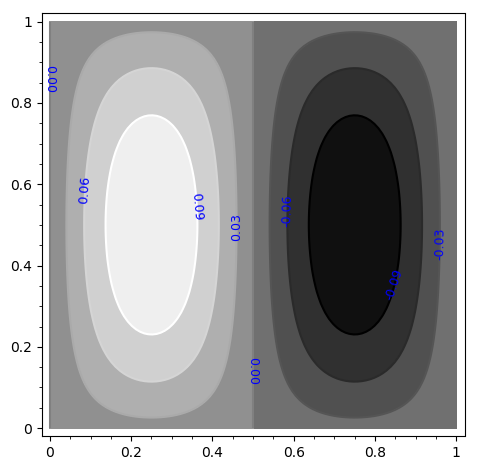

In [24]:
contour_plot(gd(eps=1e-2), (x_1, 0,1), (x_2, 0,1),  labels=True)

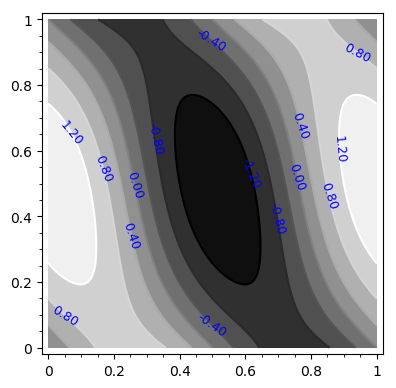

In [28]:
contour_plot(g(eps=1e-2), (x_1, 0,1), (x_2, 0,1),  labels=True)

In [25]:
plot3d(g(eps=1e-2), (x_1, 0,1), (x_2, 0,1))

Graphics3d Object

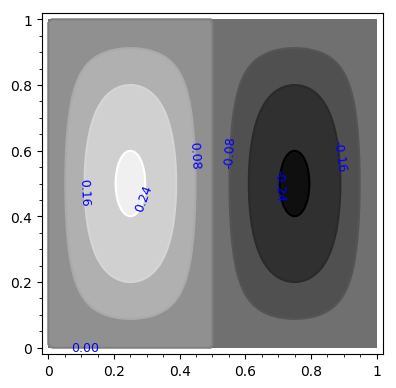

In [30]:
contour_plot(u, (x_1, 0,1), (x_2, 0,1), labels=True)

In [27]:
plot3d(u, (x_1, 0,1), (x_2, 0,1))

Graphics3d Object